In [1]:
# This code contains the kinematic calculations to move a hexapod milling or additive machine.
# equations from: https://www.janssenprecisionengineering.com/page/hexapod-kinematics/
import matplotlib.pyplot as plt
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from numpy import linalg as LA
from math import cos, sin, radians

In [2]:
# Machine Parameters:
r_base = 150 # radius of circle that hinges on the base are located on, mm
r_plat = 30 # radius of the circle that hinges on the platform are located on, mm
hinge_offset_angle = radians(15) # angle between the two hinges in a hinge pair, input: deg, stored: radians

In [3]:
# Platform Position:
B_P_Porg = np.array([40, -4, 10, 1]) # View of 1?  
# B_P_Porg.shape = (4,1)

In [7]:
def det_local_hinge_coords(r, angle_offset):
    # Creating Hinge locations from offset angles and offset angle from respective hinge
    # This essentially returns local coordinate system?
    hinge_angles = [0, radians(120), radians(240)] # The platform actuators divide the circle by 3 in pairs of 2.
    hinge_coords = []
    
    for angle in hinge_angles:
        hinge_coords.append(np.array([r*cos(angle-angle_offset/2), r*sin(angle-angle_offset/2), 0, 1]))
        hinge_coords.append(np.array([r*cos(angle+angle_offset/2), r*sin(angle+angle_offset/2), 0, 1]))
    return hinge_coords

def plot_platform(B_plat_hinge_locs, B_base_hinge_locs):
    fig = plt.figure()
    axis = fig.add_subplot(111, projection='3d')
    for coord_plat, coord_base in zip(B_plat_hinge_locs, B_base_hinge_locs):
        axis.plot(xs = [float(coord_plat[0]), float(coord_base[0])],ys = [float(coord_plat[1]),float(coord_base[1])],
                 zs = [float(coord_plat[2]),float(coord_base[2])],
                 markerfacecolor='k', markeredgecolor='k', linestyle = 'solid', marker='o', markersize=5, alpha=0.6)

[array([[-78.97338336],
       [ 11.66314307],
       [ 10.        ]]), array([[-78.97338336],
       [-19.66314307],
       [ 10.        ]]), array([[  85.92201188],
       [-114.8655439 ],
       [  10.        ]]), array([[113.05137148],
       [-99.20240083],
       [ 10.        ]]), array([[113.05137148],
       [ 91.20240083],
       [ 10.        ]]), array([[ 85.92201188],
       [106.8655439 ],
       [ 10.        ]])]


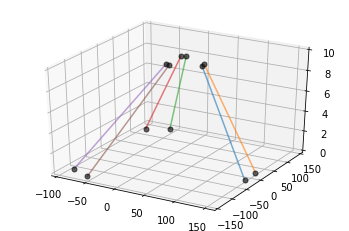

In [9]:
 

def main(): 
    B_base_hinge_locs = det_local_hinge_coords(r_base, hinge_offset_angle)
    P_plat_hinge_locs = det_local_hinge_coords(r_plat, hinge_offset_angle)
    
    Col1 = np.array([1,0,0,0]) 
    Col2 = np.array([0,1,0,0])
    Col3 = np.array([0,0,1,0])
    
    T = np.array([Col1, Col2, Col3, B_P_Porg]).transpose()
#     print(T)
    
    B_plat_hinge_locs = []
    
    # Transform the platform hinge locations into the base frame
    for hinge in P_plat_hinge_locs:
        hinge = np.array(hinge)
        hinge.shape = (4,1)
        B_plat_hinge_locs.append(T@hinge)
    for hinge_loc in B_base_hinge_locs:
        hinge_loc.shape = (4,1)
    
    # Delete the view from the data for graphing .shape from (4,1) to (3,1)
    B_plat_hinge_locs = list(map(lambda hinge_coords:np.delete(hinge_coords, 3, 0) , B_plat_hinge_locs))
    B_base_hinge_locs = list(map(lambda hinge_coords:np.delete(hinge_coords, 3, 0) , B_base_hinge_locs))
    
    plot_platform(B_plat_hinge_locs, B_base_hinge_locs)
    
    actuators_maybe=[]
    for base_hinge, plat_hinge in zip(B_base_hinge_locs, B_plat_hinge_locs):
        actuators_maybe.append(plat_hinge-base_hinge)    
    
    print(actuators_maybe)
    
    actuator_len = []
    for actuator in actuators_maybe:
        actuator_len.append(LA.norm(actuator))

if __name__ == "__main__":
    main()